### Importing required libraries and the dataset

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import pearsonr, chi2_contingency
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFECV

#importing bitocoin dataset
bitcoin_df = pd.read_csv("C:/Users/mehmo/Desktop/Predictive analytics/2nd assignment/Bitcoin.csv")
#importing Etherium datset
etherium_df =  pd.read_csv("C:/Users/mehmo/Desktop/Predictive analytics/2nd assignment/ethereum.csv")

### Exploring the the first few rows of bitcoin and ethereum dataset

In [48]:
#now doing some exploratory analysis
# looking into bitcoin dataset
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD


In [50]:
# looking into Etherium dataset
etherium_df.head()

,date,Open,High,Low,Close,price,Currency
0,3/10/2016,11.20,11.85,11.07,11.75,4,USD
1,3/11/2016,11.75,11.95,11.75,11.95,179,USD
2,3/12/2016,11.95,13.45,11.95,12.92,833,USD
3,3/13/2016,12.92,15.07,12.92,15.07,1295,USD
4,3/14/2016,15.07,15.07,11.40,12.50,92183,USD


### Dropping the Currency coloumn

In [52]:
#droping the currency column from bitcoin dataset and also etherium dataset as i don't need it for a while 
bitcoin_df = bitcoin_df.drop(columns=["Currency"])
etherium_df = etherium_df.drop(columns=['Currency'])

### Data Overview and Structure

In [54]:
#getting information about the dataset 
bitcoin_df.info()
etherium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1151 non-null   object 
 1   Open    1151 non-null   float64
 2   High    1151 non-null   float64
 3   Low     1151 non-null   float64
 4   Close   1151 non-null   float64
 5   Volume  1151 non-null   float64
dtypes: float64(5), object(1)
memory usage: 54.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2358 non-null   object 
 1   Open    2358 non-null   float64
 2   High    2358 non-null   float64
 3   Low     2358 non-null   float64
 4   Close   2358 non-null   float64
 5   price   2358 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 110.7+ KB


### Finding the missing values

In [56]:
#looking for missing values in dataset
bitcoin_df.isnull().sum()
etherium_df.isnull().sum()

date     0
Open     0
High     0
Low      0
Close    0
price    0
dtype: int64

### Descriptive Statistics of Bitcoin and Ethereum Datasets

In [58]:
#looking into the dataset descriptive statistic
etherium_stats = etherium_df[['Open', 'High', 'Low', 'Close', 'price']].describe()
bitcoin_stats = bitcoin_df[['Open', 'High', 'Low', 'Close', 'Volume']].describe()
print(etherium_stats)
print(bitcoin_stats)

              Open         High          Low        Close         price
count  2358.000000  2358.000000  2358.000000  2358.000000  2.358000e+03
mean    847.608083   877.386828   813.515225   848.270513  1.269467e+07
std    1150.297624  1186.544788  1107.868923  1150.261834  1.014013e+08
min       6.680000     7.320000     5.860000     6.700000  0.000000e+00
25%     138.767500   144.417500   134.780000   138.990000  5.465530e+05
50%     279.165000   288.000000   266.885000   280.115000  1.429778e+06
75%    1124.007500  1170.885000  1045.820000  1127.730000  7.717627e+06
max    4808.340000  4864.060000  4715.430000  4808.380000  1.792561e+09
               Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853 

### Finding the duplicates 

In [60]:
#looking for the duplicates in dataset
bitcoin_df.duplicated().sum()
etherium_df.duplicated().sum()

0

### Converting Date Columns to Datetime Format

In [62]:
#converting data type date into datatime 
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
#now doing for Etherium dataset 
etherium_df['date'] = pd.to_datetime(etherium_df['date'])

### Visualizing Bitcoin Prices Over Time

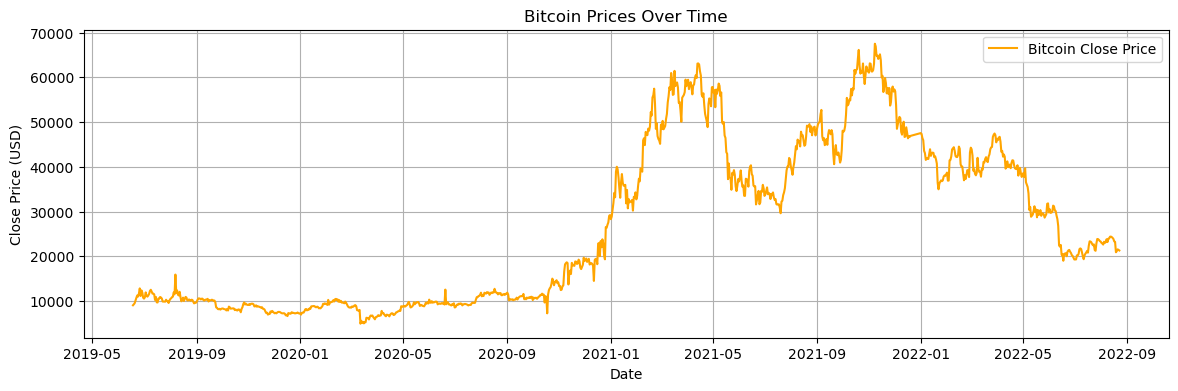

In [64]:
# viewing the price of Bitcoin over time
plt.figure(figsize=(14, 4))
plt.plot(bitcoin_df['Date'], bitcoin_df['Close'], label='Bitcoin Close Price', color='orange')
plt.title('Bitcoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

### Visualizing Ethereum Prices Over Time

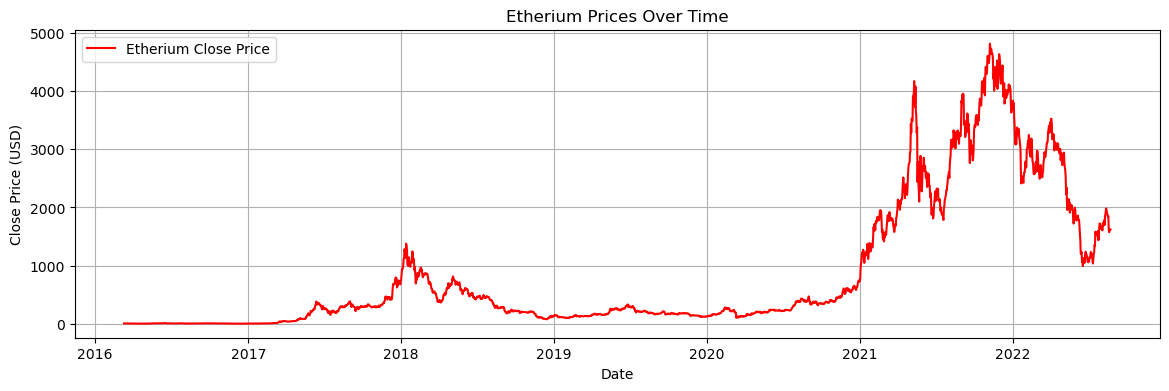

In [66]:
#Now viewing the price of Etherium over time
plt.figure(figsize=(14, 4))
plt.plot(etherium_df['date'], etherium_df['Close'], label='Etherium Close Price', color='red')
plt.title('Etherium Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

### Comparing Ethereum and Bitcoin Closing Prices Over Time

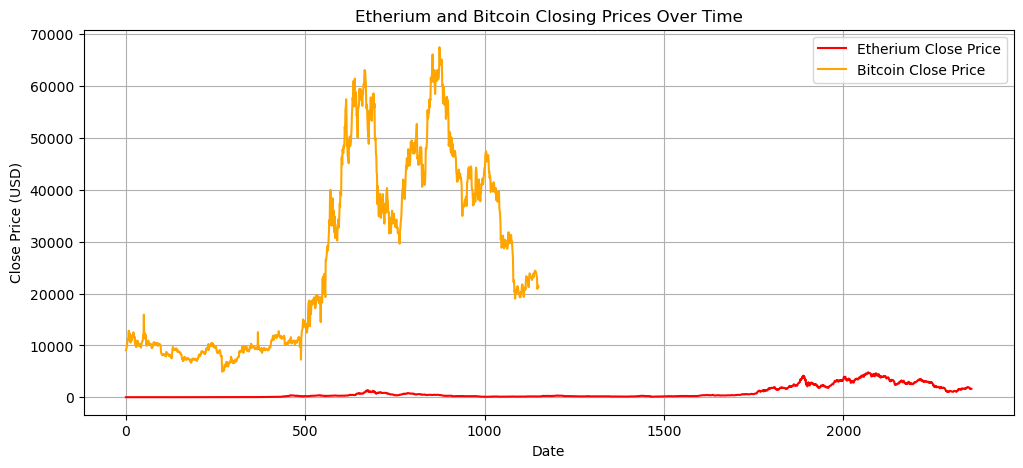

In [68]:
# Plot Ethereum and Bitcoin closing prices over time
plt.figure(figsize=(12, 5))
plt.plot(etherium_df['Close'], label='Etherium Close Price', color='red')
plt.plot(bitcoin_df['Close'], label='Bitcoin Close Price', color='orange')
plt.title('Etherium and Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.grid()
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

### Defining the Target Variable for Price Prediction

In [70]:
# Defining the Target variable
#creating new column in both datasets that shifts the Close price column by one time step
#Firstly i am doing it for bitcoin dataset
bitcoin_df['Future_Close'] = bitcoin_df['Close'].shift(-1)

# Now doing the same thing for etherium dataset
etherium_df['Future_Close'] = etherium_df['Close'].shift(-1)

#looking into the values of bitcoin dataset in new created column
unique_value = bitcoin_df['Future_Close'].unique()
unique_value
# as there are some Nan values so i have to drop it
bitcoin_df.dropna(inplace=True)

# Now looking into etherium dataset newly created column
etherium_unique = etherium_df['Future_Close'].unique()
etherium_unique

#droping Nan values from etherium dataset
etherium_df.dropna(inplace=True)

#looking the updated dataset
bitcoin_df.head()
etherium_df.head()

,date,Open,High,Low,Close,price,Future_Close
0,2016-03-10,11.20,11.85,11.07,11.75,4,11.95
1,2016-03-11,11.75,11.95,11.75,11.95,179,12.92
2,2016-03-12,11.95,13.45,11.95,12.92,833,15.07
3,2016-03-13,12.92,15.07,12.92,15.07,1295,12.50
4,2016-03-14,15.07,15.07,11.40,12.50,92183,13.06


### Correlation Analysis of Ethereum Dataset

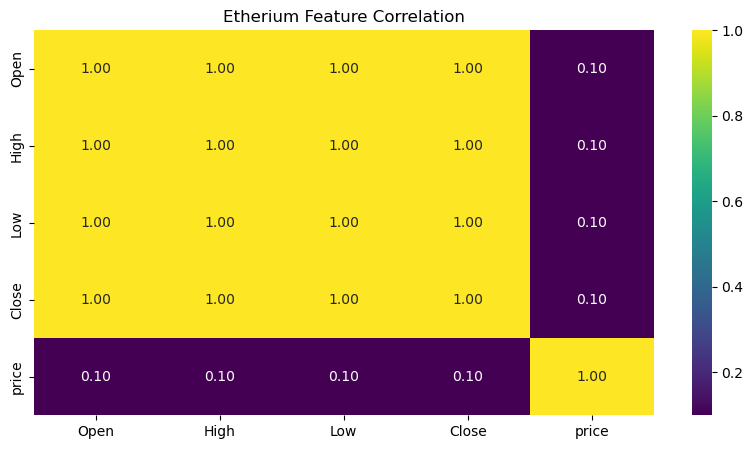

In [72]:
#finding the correlation analysis for etherium dataset
etherium_corr = etherium_df[['Open', 'High', 'Low', 'Close', 'price']].corr()
# using heatmap to plot the correlation for etherium dataset
plt.figure(figsize=(10, 5))
sns.heatmap(etherium_corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Etherium Feature Correlation")
plt.show()

### Correlation Analysis of Bitcoin Dataset

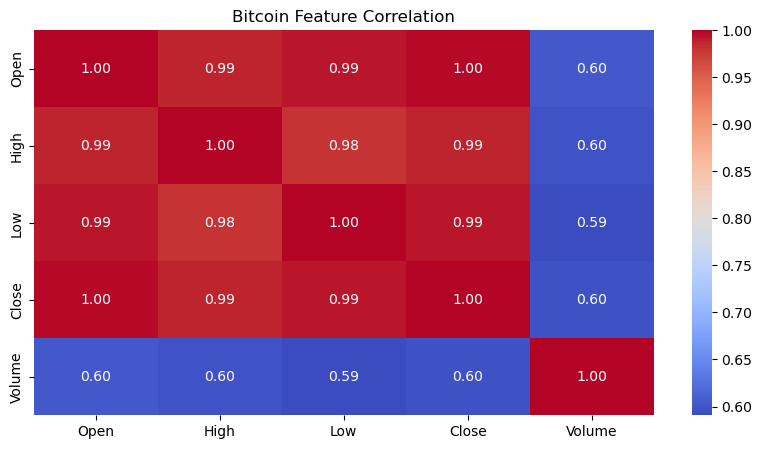

In [74]:
#finding the correlation analysis for bitcoin dataset
bitcoin_corr = bitcoin_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
# using heatmap to plot the correlation for etherium dataset
plt.figure(figsize=(10, 5))
sns.heatmap(bitcoin_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Bitcoin Feature Correlation")
plt.show()

### Feature Engineering: Adding Price Change Metrics to Ethereum Dataset

In [76]:
# Engineer new feature in Etherium dataset
#Adding price changing features to etherium dataset
etherium_df['Price_Change'] = etherium_df['Close'] - etherium_df['Open']
etherium_df['Pct_Change'] = ((etherium_df['Close'] - etherium_df['Open']) / etherium_df['Open']) * 100
etherium_df.head()

,date,Open,High,Low,Close,price,Future_Close,Price_Change,Pct_Change
0,2016-03-10,11.20,11.85,11.07,11.75,4,11.95,0.55,4.910714
1,2016-03-11,11.75,11.95,11.75,11.95,179,12.92,0.20,1.702128
2,2016-03-12,11.95,13.45,11.95,12.92,833,15.07,0.97,8.117155
3,2016-03-13,12.92,15.07,12.92,15.07,1295,12.50,2.15,16.640867
4,2016-03-14,15.07,15.07,11.40,12.50,92183,13.06,-2.57,-17.053749


### Feature Engineering: Adding Price Spread Features to Ethereum Dataset

In [78]:
#Finding and adding the price spread features to etherium dataset 
etherium_df['Price_Spread'] = etherium_df['High'] - etherium_df['Low']
etherium_df['Pct_Spread'] = ((etherium_df['High'] - etherium_df['Low']) / etherium_df['Low']) * 100
etherium_df.head()

,date,Open,High,Low,Close,price,Future_Close,Price_Change,Pct_Change,Price_Spread,Pct_Spread
0,2016-03-10,11.20,11.85,11.07,11.75,4,11.95,0.55,4.910714,0.78,7.046070
1,2016-03-11,11.75,11.95,11.75,11.95,179,12.92,0.20,1.702128,0.20,1.702128
2,2016-03-12,11.95,13.45,11.95,12.92,833,15.07,0.97,8.117155,1.50,12.552301
3,2016-03-13,12.92,15.07,12.92,15.07,1295,12.50,2.15,16.640867,2.15,16.640867
4,2016-03-14,15.07,15.07,11.40,12.50,92183,13.06,-2.57,-17.053749,3.67,32.192982


### Feature Engineering: Adding Short-Term and Long-Term Moving Averages to Ethereum Dataset

In [80]:
#calculating and adding the short term 7 days and long term 30 days moving average for etherium dataset
etherium_df['MA_7'] = etherium_df['Close'].rolling(window=7).mean()
etherium_df['MA_30'] = etherium_df['Close'].rolling(window=30).mean()
etherium_df

,date,Open,High,Low,Close,price,Future_Close,Price_Change,Pct_Change,Price_Spread,Pct_Spread,MA_7,MA_30
0,2016-03-10,11.20,11.85,11.07,11.75,4,11.95,0.55,4.910714,0.78,7.046070,NaN,NaN
1,2016-03-11,11.75,11.95,11.75,11.95,179,12.92,0.20,1.702128,0.20,1.702128,NaN,NaN
2,2016-03-12,11.95,13.45,11.95,12.92,833,15.07,0.97,8.117155,1.50,12.552301,NaN,NaN
3,2016-03-13,12.92,15.07,12.92,15.07,1295,12.50,2.15,16.640867,2.15,16.640867,NaN,NaN
4,2016-03-14,15.07,15.07,11.40,12.50,92183,13.06,-2.57,-17.053749,3.67,32.192982,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,2022-08-18,1834.19,1880.22,1822.04,1846.51,675269,1609.48,12.32,0.671686,58.18,3.193124,1904.838571,1709.688333
2353,2022-08-19,1846.52,1846.97,1607.60,1609.48,1594321,1575.60,-237.04,-12.837121,239.37,14.889898,1855.102857,1712.649667
2354,2022-08-20,1609.01,1654.84,1525.51,1575.60,1007240,1618.25,-33.41,-2.076432,129.33,8.477821,1796.831429,1712.647000
2355,2022-08-21,1575.61,1644.88,1563.92,1618.25,852071,1626.75,42.64,2.706253,80.96,5.176735,1751.567143,1715.427000


### Feature Engineering: Calculating 7-Day Volatility for Ethereum

In [82]:
# calculating the standard deviation of daily return
etherium_df['Volatility_7'] = etherium_df['Close'].pct_change().rolling(window=7).std()
#AS there are some Nan values bcz of newly created column so droping theses nan values
etherium_df.dropna(inplace=True)
etherium_df.head()

,date,Open,High,Low,Close,price,Future_Close,Price_Change,Pct_Change,Price_Spread,Pct_Spread,MA_7,MA_30,Volatility_7
29,2016-04-08,10.05,10.34,9.60,9.71,25974,9.15,-0.34,-3.383085,0.74,7.708333,10.785714,11.497000,0.039590
30,2016-04-09,9.69,10.20,9.00,9.15,64964,8.76,-0.54,-5.572755,1.20,13.333333,10.434286,11.410333,0.039725
31,2016-04-10,9.15,9.43,7.52,8.76,171987,8.68,-0.39,-4.262295,1.91,25.398936,10.007143,11.304000,0.034472
32,2016-04-11,8.56,8.93,8.01,8.68,60277,7.53,0.12,1.401869,0.92,11.485643,9.654286,11.162667,0.035956
33,2016-04-12,8.53,8.54,7.21,7.53,63823,8.09,-1.00,-11.723329,1.33,18.446602,9.244286,10.911333,0.051099


### Heatmap Visualization of Ethereum Feature Correlations After Feature Engineering

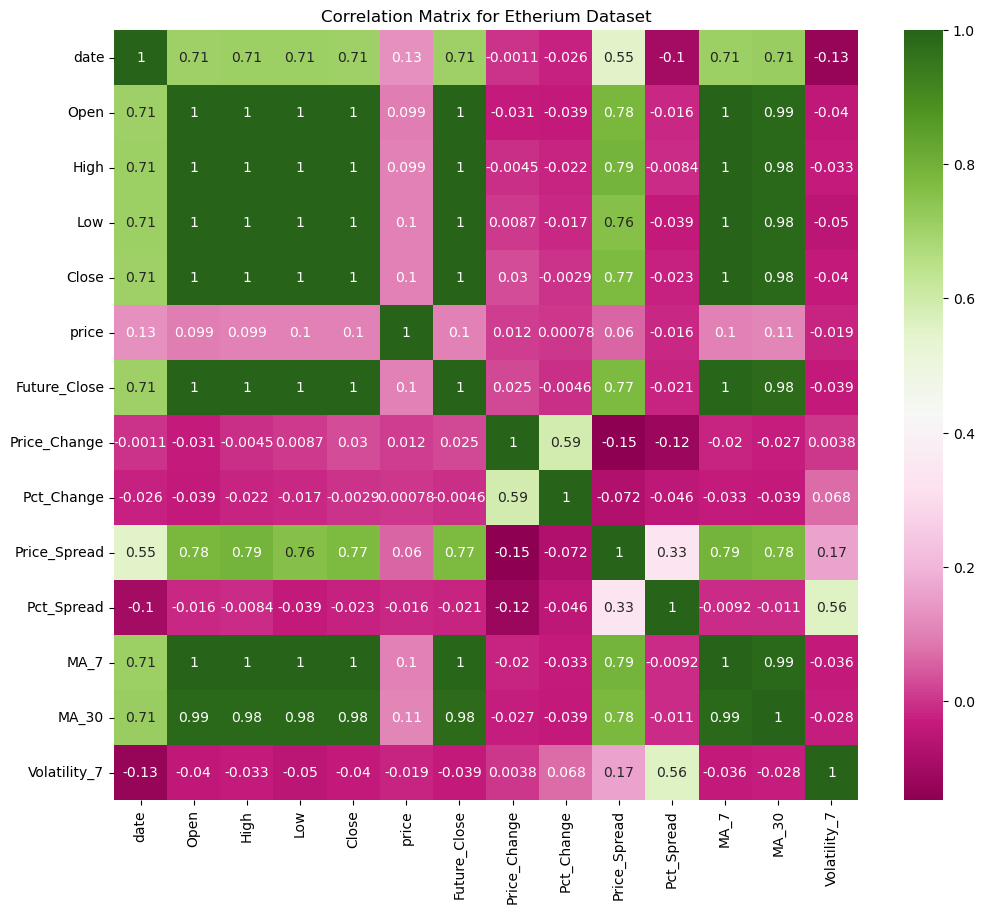

In [84]:
#correlation to find relationship between dependent and independ variable or feature and target variable after engineering
# calculating the correlation 
correlation_matrix = etherium_df.corr()

# using heatmap to plot the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG")
plt.title("Correlation Matrix for Etherium Dataset")
plt.show()

### Feature Engineering: Adding Price Change Metrics to Bitcoin Dataset

In [86]:
#Now Engineering new feature for bitcoin data set 
#calculating and adding the price change itno bitcoin dataset
bitcoin_df['Price_Change'] = bitcoin_df['Close'] - bitcoin_df['Open']
bitcoin_df['Pct_Change'] = ((bitcoin_df['Close'] - bitcoin_df['Open']) / bitcoin_df['Open']) * 100
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume,Future_Close,Price_Change,Pct_Change
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,9271.459961,-66.223633,-0.725478
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,9519.200195,203.285156,2.241743
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,10127.998047,247.632812,2.670884
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,10719.981445,601.164062,6.310219
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,11246.518555,568.090820,5.595912


### Feature Engineering: Adding Price Spread Features to Bitcoin Dataset

In [88]:
#calculating and adding price spread for bitcoin dataset
bitcoin_df['Price_Spread'] = bitcoin_df['High'] - bitcoin_df['Low']
bitcoin_df['Pct_Spread'] = ((bitcoin_df['High'] - bitcoin_df['Low']) / bitcoin_df['Low']) * 100
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume,Future_Close,Price_Change,Pct_Change,Price_Spread,Pct_Spread
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,9271.459961,-66.223633,-0.725478,161.157227,1.792906
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,9519.200195,203.285156,2.241743,226.583008,2.503377
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,10127.998047,247.632812,2.670884,364.272461,3.955435
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,10719.981445,601.164062,6.310219,604.101562,6.341053
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,11246.518555,568.090820,5.595912,1087.824219,10.788493


### Feature Engineering: Adding Short-Term and Long-Term Moving Averages to Bitcoin Dataset

In [90]:
#cacluatin and adding short term 7 days and long term 30 days moving average
bitcoin_df['MA_7'] = bitcoin_df['Close'].rolling(window=7).mean()
bitcoin_df['MA_30'] = bitcoin_df['Close'].rolling(window=30).mean()
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume,Future_Close,Price_Change,Pct_Change,Price_Spread,Pct_Spread,MA_7,MA_30
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,9271.459961,-66.223633,-0.725478,161.157227,1.792906,NaN,NaN
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,9519.200195,203.285156,2.241743,226.583008,2.503377,NaN,NaN
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,10127.998047,247.632812,2.670884,364.272461,3.955435,NaN,NaN
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,10719.981445,601.164062,6.310219,604.101562,6.341053,NaN,NaN
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,11246.518555,568.090820,5.595912,1087.824219,10.788493,NaN,NaN


### Feature Engineering: Calculating 7-Day Volatility for Bitcoin

In [92]:
#calculating and adding the standard deviation to bitcoin dataset
bitcoin_df['Volatility_7'] = bitcoin_df['Close'].pct_change().rolling(window=7).std()

#droping the Nan values
bitcoin_df.dropna(inplace=True)
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume,Future_Close,Price_Change,Pct_Change,Price_Spread,Pct_Spread,MA_7,MA_30,Volatility_7
29,2019-07-17,9833.953125,10002.206055,9138.093750,9685.883789,444337.0,10548.814453,-148.069336,-1.505695,864.112305,9.456155,10771.386858,11076.655436,0.063742
30,2019-07-18,9689.371094,10660.923828,9239.602539,10548.814453,321096.0,10572.655273,859.443359,8.869960,1421.321289,15.382927,10612.605469,11126.214388,0.077570
31,2019-07-19,10548.814453,10825.875000,10193.408203,10572.655273,122121.0,10913.607422,23.840820,0.226005,632.466797,6.204665,10458.347656,11169.587565,0.077647
32,2019-07-20,10597.679688,11314.213867,10265.417969,10913.607422,240565.0,10792.991211,315.927734,2.981103,1048.795898,10.216787,10372.339565,11216.067806,0.079352
33,2019-07-21,10913.607422,11229.353516,10204.167969,10792.991211,145889.0,10556.007812,-120.616211,-1.105191,1025.185547,10.046733,10451.065011,11238.234245,0.064835


### Heatmap Visualization of Bitcoin Feature Correlations After Feature Engineering

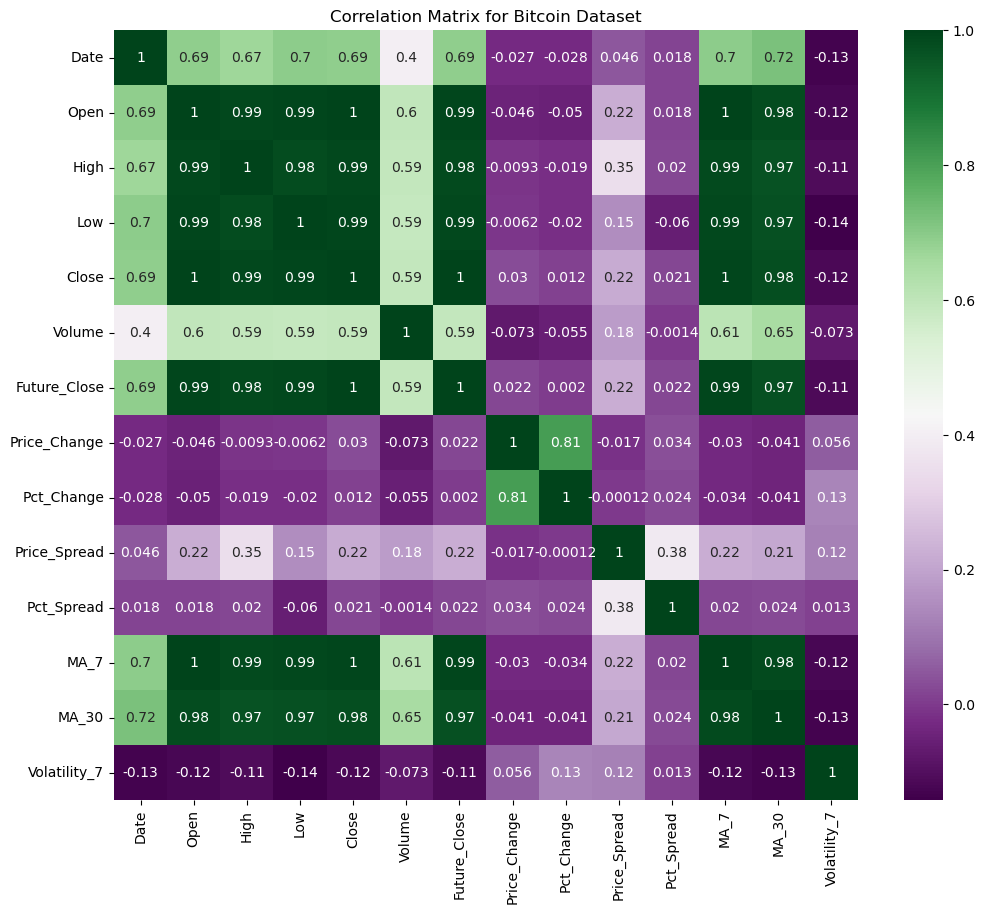

In [94]:
#correlation to find relationship between dependent and independ variable or feature and target variable after engineering
# calculating the correlation 
correlation_matrix = bitcoin_df.corr()

# using heatmap to plot the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="PRGn")
plt.title("Correlation Matrix for Bitcoin Dataset")
plt.show()

### Feature Scaling: Standardizing Bitcoin and Ethereum Datasets for Improved Model Performance

In [96]:

#Next step is scaling the features to a common range to imporve the model performance
# Selecting the numerical features from bitcoin dataset for purpose of scalling 
bitcoin_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'Pct_Change', 
                    'Price_Spread', 'Pct_Spread', 'MA_7', 'MA_30', 'Volatility_7']

#now Selecting the numerical features from etherium dataset for purpose of scalling 
etherium_features = ['Open', 'High', 'Low', 'Close', 'price', 'Price_Change', 
                     'Pct_Change', 'Price_Spread', 'Pct_Spread', 'MA_7', 'MA_30', 'Volatility_7']

#now it's time for standard scaler
s_scaler = StandardScaler()

#firstly scaling the Bitcoin features
bitcoin_scaling = pd.DataFrame(s_scaler.fit_transform(bitcoin_df[bitcoin_features]), 
                              columns=bitcoin_features, 
                              index=bitcoin_df.index)


#now doing the same for etherium to scale the etherium dataset features
etherium_scaling = pd.DataFrame(s_scaler.fit_transform(etherium_df[etherium_features]), 
                               columns=etherium_features, 
                               index=etherium_df.index)
#now it's time view the scaled dataset
print("\nScaled Bitcoin Data:")
print(bitcoin_scaling.head())
print("\nScaled Ethereum Data:")
print(etherium_scaling.head())


Scaled Bitcoin Data:
        Open      High       Low     Close    Volume  Price_Change  \
29 -0.946629 -0.970463 -0.949969 -0.955854 -0.553541     -0.113649   
30 -0.954653 -0.934834 -0.944182 -0.907935 -0.555889      0.621193   
31 -0.906957 -0.925912 -0.889813 -0.906611 -0.559680      0.011736   
32 -0.904245 -0.899498 -0.885708 -0.887678 -0.557423      0.224773   
33 -0.886712 -0.904088 -0.889200 -0.894376 -0.559227     -0.093626   

    Pct_Change  Price_Spread  Pct_Spread      MA_7     MA_30  Volatility_7  
29   -0.313997     -0.337844   -0.041061 -0.895622 -0.877389      0.562682  
30    1.584126     -0.190396   -0.041058 -0.904456 -0.874614      0.958906  
31    0.002800     -0.399142   -0.041063 -0.913038 -0.872185      0.961098  
32    0.506818     -0.288973   -0.041061 -0.917823 -0.869582      1.009972  
33   -0.240729     -0.295221   -0.041061 -0.913443 -0.868341      0.593981  

Scaled Ethereum Data:
        Open      High       Low     Close     price  Price_Change  \
29

### Applying Correlation, Information Gain, and Chi-Square for Bitcoin Feature Selection

Selected features for Bitcoin: ['MA_7', 'Price_Change', 'Pct_Spread', 'Pct_Change', 'Low', 'MA_30', 'Volume', 'High', 'Volatility_7', 'Price_Spread', 'Close', 'Open']

Bitcoin feature scores:
MA_7: Correlation: 0.9928, Information Gain: 2.1005, Chi-Square: 4944.0041
Price_Change: Correlation: 0.0223, Information Gain: 0.2328, Chi-Square: 393.9286
Pct_Spread: Correlation: 0.0225, Information Gain: 0.0000, Chi-Square: 19.1825
Pct_Change: Correlation: 0.0020, Information Gain: 0.0093, Chi-Square: 111.2691
Low: Correlation: 0.9906, Information Gain: 2.2759, Chi-Square: 4427.4065
MA_30: Correlation: 0.9726, Information Gain: 1.8177, Chi-Square: 3094.7757
Volume: Correlation: 0.5908, Information Gain: 0.8131, Chi-Square: 470.3253
High: Correlation: 0.9849, Information Gain: 2.2582, Chi-Square: 4569.8601
Volatility_7: Correlation: 0.1146, Information Gain: 0.4311, Chi-Square: 303.7534
Price_Spread: Correlation: 0.2198, Information Gain: 0.4309, Chi-Square: 26.8268
Close: Correlation: 0.9971, 

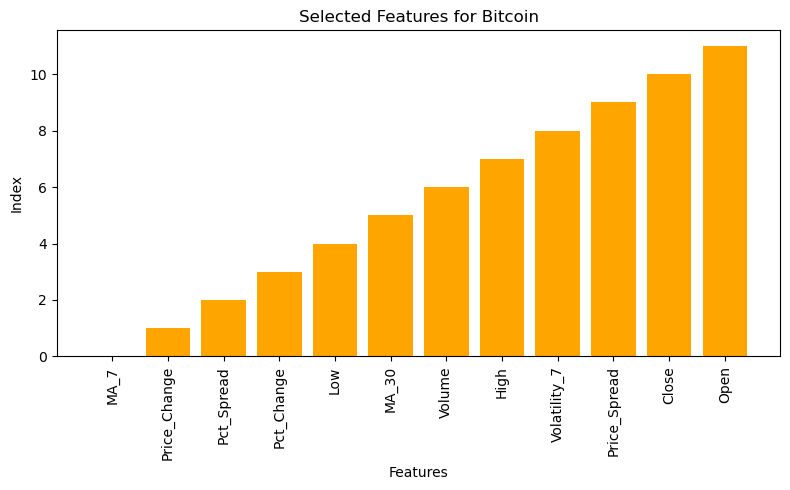

In [98]:
#Filter method

#applying feature selection utilizing filter method bases on correlation with target variable 
# for this i have find the correlation between the target variable(Future_Close) and each attribute
# then to chose  features whose correlation is higher than a predetermined level

# Define functions for feature selection methods
def calculate_correlations(df, features, target):
    correlations = {}
    for feature in features:
        corr, _ = pearsonr(df[feature], df[target])
        correlations[feature] = abs(corr)
    return correlations

def calculate_information_gain(X, y):
    mi_scores = mutual_info_regression(X, y)
    return dict(zip(X.columns, mi_scores))

def calculate_chi_square(df, features, target):
    chi_scores = {}
    for feature in features:
        contingency_table = pd.crosstab(df[feature], df[target])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        chi_scores[feature] = chi2
    return chi_scores

def select_features(scores, threshold):
    return [feature for feature, score in scores.items() if score > threshold]

# Defining target variable
target_variable = 'Future_Close'

# Preparing X and y for Bitcoin 
X_bitcoin = bitcoin_df[bitcoin_features]
y_bitcoin = bitcoin_df[target_variable]

# Calculating the  Correlations for bitcoin dataset
bitcoin_corr = calculate_correlations(bitcoin_df, bitcoin_features, target_variable)

# Calculating the information gain for bitcoin dataset
bitcoin_information_gain = calculate_information_gain(X_bitcoin, y_bitcoin)

#Transforming continuous data into discrete
# Discretize features and target for Chi-Square test
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Discretizing the freautre and target for bitcoin dataset
X_bitcoin_disc = pd.DataFrame(discretizer.fit_transform(X_bitcoin), columns=bitcoin_features)
y_bitcoin_disc = pd.Series(discretizer.fit_transform(y_bitcoin.values.reshape(-1, 1)).flatten(), name=target_variable)
bitcoin_disc_df = pd.concat([X_bitcoin_disc, y_bitcoin_disc], axis=1)

# now calculating the CHI square for bitcoin dataset
bitcoin_chi = calculate_chi_square(bitcoin_disc_df, bitcoin_features, target_variable)

# Setting the thresholds
corr_threshold = 0.5
ig_threshold = 0.1
chi_threshold = 10

# Selecting features based on different methods for bitcoin
bitcoin_corr_features = select_features(bitcoin_corr, corr_threshold)
bitcoin_information_gain_features = select_features(bitcoin_information_gain, ig_threshold)
bitcoin_chi_features = select_features(bitcoin_chi, chi_threshold)

# Combining the  features selected from different methods for bitcoin 
bitcoin_selected_features = list(set(bitcoin_corr_features + bitcoin_information_gain_features + bitcoin_chi_features))

# Printing result
print("Selected features for Bitcoin:", bitcoin_selected_features)

print("\nBitcoin feature scores:")
for feature in bitcoin_selected_features:
    print(f"{feature}: Correlation: {bitcoin_corr.get(feature, 0):.4f}, "
          f"Information Gain: {bitcoin_information_gain.get(feature, 0):.4f}, "
          f"Chi-Square: {bitcoin_chi.get(feature, 0):.4f}")

# Plotting the selected features for Bitcoin
plt.figure(figsize=(8, 5))
plt.bar(bitcoin_selected_features, range(len(bitcoin_selected_features)), color='orange')
plt.title("Selected Features for Bitcoin")
plt.xlabel("Features")
plt.ylabel("Index")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Applying RFE for Optimal Feature Selection in Bitcoin Price Prediction

Bitcoin Results:
Selected features: Index(['Open', 'High', 'Low', 'Close', 'MA_7'], dtype='object')
Mean Squared Error (MSE): 2287989.838587792
R-squared: 0.9926938307146177


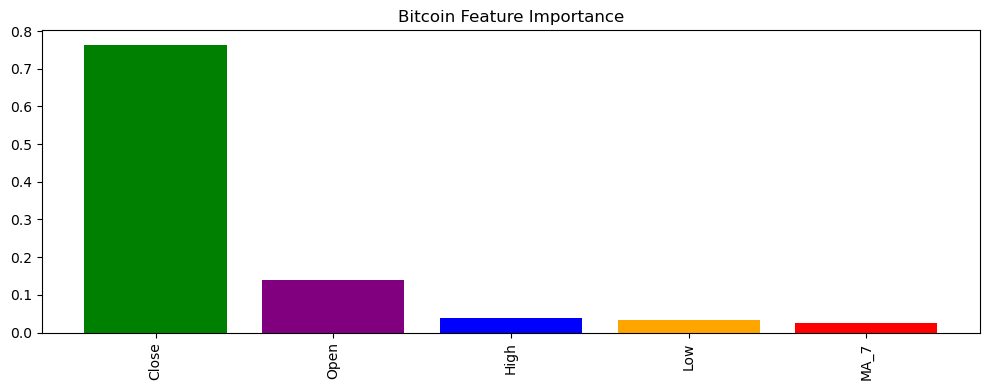

In [100]:
#Wrapper methods: (RFE)

# training model with different features and then selecting that perform best (e.g.Recursive Feature Elimination (RFE))
#Defining features for bitcoin dataset
bitcoin_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'Pct_Change', 
                    'Price_Spread', 'Pct_Spread', 'MA_7', 'MA_30', 'Volatility_7']

# Defining target variable
target_variable = 'Future_Close'

# Create shifted target variable for prediction (next day's close price)
bitcoin_df['Future_Close'] = bitcoin_df['Close'].shift(-1)

# Droping rows with NaN values caused by shifting
bitcoin_df.dropna(inplace=True)
def perform_rfe(df, features, target, n_features_to_select=5):
    # Prepare data
    X = df[features]
    y = df[target]
    
    # Spliting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initializing Random Forest Regressor estimator 
    estimator = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Perform RFE
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    
    # Getting the  selected features
    selected_features = X.columns[rfe.support_]
    
    # Training the final model with selected features
    final_model = RandomForestRegressor(n_estimators=100, random_state=42)
    final_model.fit(X_train[selected_features], y_train)
    
    # Making predictions on test set
    y_pred = final_model.predict(X_test[selected_features])
    
    # Calculating the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return selected_features, final_model, mse, r2

# Performing RFE for Bitcoin dataset
bitcoin_selected_features, bitcoin_model, bitcoin_mse, bitcoin_r2 = perform_rfe(bitcoin_df, bitcoin_features, target_variable)

# Printing the results for Bitcoin
print("Bitcoin Results:")
print("Selected features:", bitcoin_selected_features)
print("Mean Squared Error (MSE):", bitcoin_mse)
print("R-squared:", bitcoin_r2)

# defining function to plot feature importance for the models 
def plot_feature_importance(model, features, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
   
    colors = ['green', 'purple', 'blue', 'orange', 'red'] 
    
    plt.figure(figsize=(10, 4))
    plt.title(title)
    
    # Using the color parameter to assign  colors
    plt.bar(range(len(importances)), importances[indices], color=[colors[i % len(colors)] for i in range(len(importances))])
    
    plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Ploting feature importance for Bitcoin model 
plot_feature_importance(bitcoin_model, bitcoin_selected_features, "Bitcoin Feature Importance")

### Feature Selection Using Embedded Method: LASSO Regression for Bitcoin

Bitcoin Results (Lasso):
Selected features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'Pct_Change', 'Price_Spread', 'Pct_Spread', 'MA_7', 'MA_30', 'Volatility_7']
Mean Squared Error (MSE): 2168362.6873744424
R-squared: 0.9931074732059931


C:\Users\mehmo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+08, tolerance: 2.925e+07
  model = cd_fast.enet_coordinate_descent(


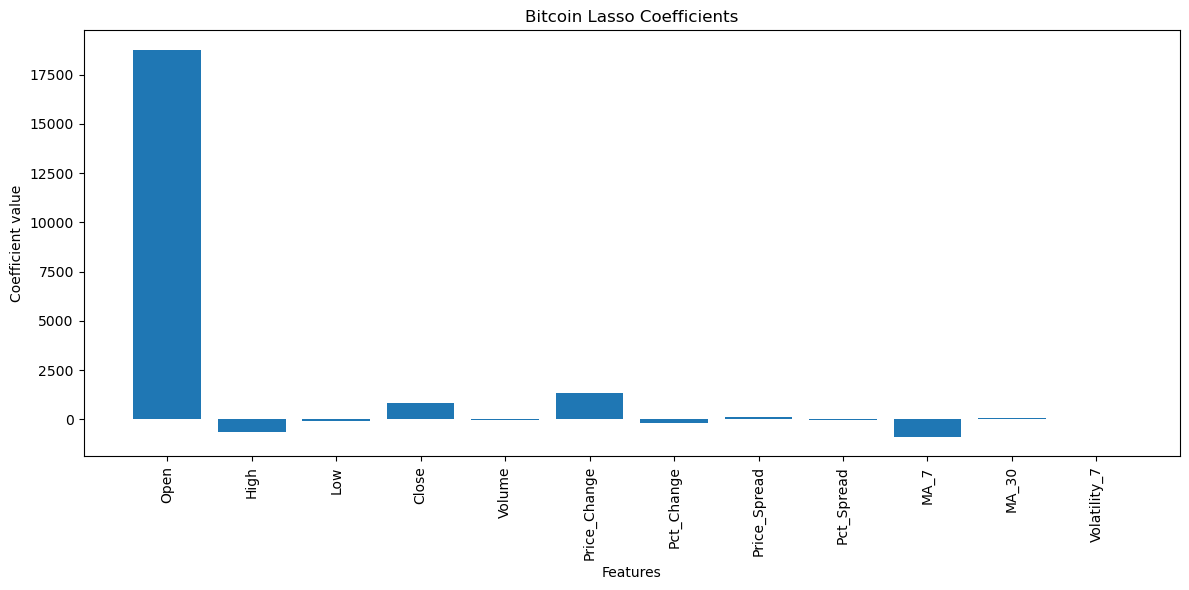

In [102]:
#Embedded methods:(LASSO regression)
#Embaded feature selection using LASSO Regression

#function perform_lasso_feature_selection to perform feature selection using Lasso regression.
def perform_lasso_feature_selection(df, features, target, alpha=0.1):
    # Prepare data
    X = df[features]
    y = df[target]
    
    # Spliting data into training and testing sets 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
    
    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initializing  and fitting the Lasso model
    lasso = Lasso(alpha=alpha, random_state=50)
    lasso.fit(X_train_scaled, y_train)
    
    # now getting the  selected features
    selected_features = [feature for feature, coef in zip(features, lasso.coef_) if coef != 0]
    
    # using model to make predictions on test set
    y_pred = lasso.predict(X_test_scaled)
    
    # Calculating the  performance of model using mse and rsquared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return lasso, selected_features, mse, r2

# it'stime to Performe the  Lasso feature selection for Bitcoin dataset
bitcoin_lasso, bitcoin_selected_features, bitcoin_mse, bitcoin_r2 = perform_lasso_feature_selection(bitcoin_df, bitcoin_features, target_variable)

# Print results for Bitcoin
print("Bitcoin Results (Lasso):")
print("Selected features:", bitcoin_selected_features)
print("Mean Squared Error (MSE):", bitcoin_mse)
print("R-squared:", bitcoin_r2)

# Function to plot Lasso coefficients
def plot_lasso_coefficients(lasso_model, features, title):
    coefficients = lasso_model.coef_
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(coefficients)), coefficients)
    plt.title(title)
    plt.xlabel("Features")
    plt.ylabel("Coefficient value")
    plt.xticks(range(len(coefficients)), features, rotation=90)
    plt.tight_layout()
    plt.show()

# Plot Lasso coefficients for Bitcoin
plot_lasso_coefficients(bitcoin_lasso, bitcoin_features, "Bitcoin Lasso Coefficients")

### Bitcoin Price Forecasting Using Linear Regression

In [104]:
#Now applying the Linear regression to dataset 
# Defining features for bitcoin dataset 
bitcoin_features = ['Open', 'Close', 'Price_Change', 'Pct_Change', 'MA_7', 'MA_30', 'Volatility_7']

#defining the target variable
target_variable = "Future_Close"

# Preparing X and y for Bitcoin
X_bitcoin = bitcoin_df[bitcoin_features]
y_bitcoin = bitcoin_df[target_variable]


# Spliting data into training and testing sets (80% train, 20% test) for bitcoin
X_train_bitcoin, X_test_bitcoin, y_train_bitcoin, y_test_bitcoin = train_test_split(
    X_bitcoin, y_bitcoin, test_size=0.2, random_state=50)


# Initialize Linear Regression model first for bitoin
linear_regression_bitcoin = LinearRegression()


# now time to train the model for bitcoin 
linear_regression_bitcoin.fit(X_train_bitcoin, y_train_bitcoin)


# time to make prediction first bitcoin
bitcoin_y_pred = linear_regression_bitcoin.predict(X_test_bitcoin)


# Using MSE, R-squared and RMSE score to evaluate the  model for bitcoin
mse_bitcoin = mean_squared_error(y_test_bitcoin, bitcoin_y_pred)
r2_bitcoin = r2_score(y_test_bitcoin, bitcoin_y_pred)
rmse_bitcoin = np.sqrt(mse_bitcoin)


print("Bitcoin Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_bitcoin:.2f}")
print(f"R-squared Score: {r2_bitcoin:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_bitcoin:.2f}")


Bitcoin Linear Regression Model Performance:
Mean Squared Error (MSE): 2156500.83
R-squared Score: 0.9931
Root Mean Squared Error (RMSE): 1468.50


### Bitcoin Price Forecasting Using Random Forest

In [106]:
#Applying the random forest algorithm to bitcoin and etherium dataset
# Define features and target variable
bitcoin_features = ['Open', 'Close', 'Price_Change', 'Pct_Change', 'MA_7', 'MA_30', 'Volatility_7']
target_variable = "Future_Close"

#preparing the X and y for bitcoin
X_bitcoin = bitcoin_df[bitcoin_features]
y_bitcoin = bitcoin_df[target_variable]


#spliting the data into 80% training and 20% testing
# Spliting Bitcoin data
X_train_bitcoin, X_test_bitcoin, y_train_bitcoin, y_test_bitcoin = train_test_split(
    X_bitcoin, y_bitcoin, test_size=0.2, random_state=50)


#now it's time intialize the RandomForestRegressor for bitcoin
random_forest_bitcoin = RandomForestRegressor(n_estimators=100, random_state=50)


#time to tain the model
# first bitcoin
random_forest_bitcoin.fit(X_train_bitcoin, y_train_bitcoin)


# time to make prediciton for bitcoin
bitcoin_y_pred = random_forest_bitcoin.predict(X_test_bitcoin)

#Evaluating the model using MSE, R_square, and RMSE score for bitcoin
mse_bitcoin = mean_squared_error(y_test_bitcoin, bitcoin_y_pred)
r2_bitcoin = r2_score(y_test_bitcoin, bitcoin_y_pred)
rmse_bitcoin = np.sqrt(mse_bitcoin)


print("Bitcoin Model Performance:")
print(f"Mean Squared Error (MSE): {mse_bitcoin}")
print(f"R-squared (R2): {r2_bitcoin}")
print(f"Root Mean Squared Error (RMSE): {rmse_bitcoin:.2f}")


#anayzing the feature importance first for bitcoin
bitcoin_importances = pd.DataFrame({
    "Feature": bitcoin_features,
    "Importance": random_forest_bitcoin.feature_importances_
}).sort_values(by="Importance", ascending=False)


print("\nBitcoin Feature Importances:")
print(bitcoin_importances)



Bitcoin Model Performance:
Mean Squared Error (MSE): 2517247.206300053
R-squared (R2): 0.991998481657342
Root Mean Squared Error (RMSE): 1586.58

Bitcoin Feature Importances:
        Feature  Importance
1         Close    0.837334
0          Open    0.119533
5         MA_30    0.031781
4          MA_7    0.009749
6  Volatility_7    0.000899
2  Price_Change    0.000371
3    Pct_Change    0.000333


### Bitcoin Price Forecasting Using KNN

In [108]:
#NOW applying KNN model on the dataset
# Defining features for bitcoin
bitcoin_features = ['Open', 'Close', 'Price_Change', 'Pct_Change', 'MA_7', 'MA_30', 'Volatility_7']

#defining the target variable
target_varible = 'Future_Close'

# Prepare X and y for bitcoin dataset
X_bitcoin = bitcoin_df[bitcoin_features]
y_bitcoin = bitcoin_df[target_variable]


# Spliting the data into training and testing sets (80% train, 20% test) for bitcoin
X_train_bitcoin, X_test_bitcoin, y_train_bitcoin, y_test_bitcoin = train_test_split(X_bitcoin, y_bitcoin, test_size=0.2, random_state=50)


# now time to scale the features using StandardScaler
scaler = StandardScaler()
scaled_X_train_bitcoin = scaler.fit_transform(X_train_bitcoin)
scaled_X_test_bitcoin = scaler.transform(X_test_bitcoin)


# time to  nitialize KNN models first for bitcoin
knn_bitcoin = KNeighborsRegressor(n_neighbors=5)


# next step is training the models
knn_bitcoin.fit(scaled_X_train_bitcoin, y_train_bitcoin)

# time to make predictions
bitcoin_y_pred = knn_bitcoin.predict(scaled_X_test_bitcoin)

# Evaluating the models using MSE, R-squared and RMSE score first bitcoin
mse_bitcoin = mean_squared_error(y_test_bitcoin, bitcoin_y_pred)
r2_bitcoin = r2_score(y_test_bitcoin, bitcoin_y_pred)
rmse_bitcoin = np.sqrt(mse_bitcoin)


print("Bitcoin KNN Model Performance:")
print(f"Mean Squared Error (MSE): {mse_bitcoin:.2f}")
print(f"R-squared Score: {r2_bitcoin:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_bitcoin:.2f}")


Bitcoin KNN Model Performance:
Mean Squared Error (MSE): 4683077.78
R-squared Score: 0.9851
Root Mean Squared Error (RMSE): 2164.04


### Evaluating Model Accuracy: MSE, RMSE, and R-Squared Metrics

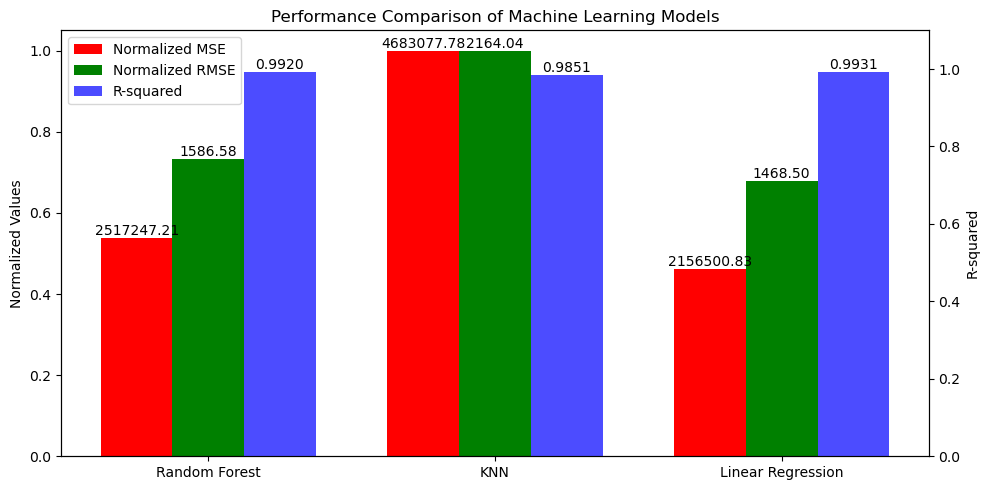

In [112]:
#Performance Analysis of Machine Learning Algorithms Using Mean square error(MSE), Root Mean Squared Error(RMSE), and R-Squared
# algorithm results 
models = ['Random Forest', 'KNN', 'Linear Regression']
mse = [2517247.21, 4683077.78, 2156500.83]
r2 = [0.9920, 0.9851, 0.9931]
rmse = [1586.58, 2164.04, 1468.50]

#To improve visibility, normalizing Mean square error and  Root Mean Squared Error
mse_normalized = [val / max(mse) for val in mse]
rmse_normalized = [val / max(rmse) for val in rmse]

# generating a range of uniformly spaced bar (indices) on the x-axis. 
x = np.arange(len(models))
width = 0.25

fig, ax1 = plt.subplots(figsize=(10, 5))

# visualizing thenormalized Mean square error  and Root mean square error
bar1 = ax1.bar(x - width, mse_normalized, width, color='red', label='Normalized MSE')
bar2 = ax1.bar(x, rmse_normalized, width, color='green', label='Normalized RMSE')
ax1.set_ylabel('Normalized Values')
ax1.set_title('Performance Comparison of Machine Learning Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# now a secondary y-axis for R-squared should be added
ax2 = ax1.twinx()
bar3 = ax2.bar(x + width, r2, width, color='blue', alpha=0.7, label='R-squared')
ax2.set_ylabel('R-squared')
ax2.set_ylim(0, 1.1)  

# for clearity adding and combining the legends
bars = [bar1[0], bar2[0], bar3[0]]  # Select one bar from each group
labels = ['Normalized MSE', 'Normalized RMSE', 'R-squared']
ax1.legend(bars, labels, loc='upper left')

# Adding the values on top of each bar for more readibility
for a, b in enumerate(mse_normalized):
    ax1.text(a - width, b, f'{mse[a]:.2f}', ha='center', va='bottom')
for a, b in enumerate(rmse_normalized):
    ax1.text(a, b, f'{rmse[a]:.2f}', ha='center', va='bottom')
for a, b in enumerate(r2):
    ax2.text(a + width, b, f'{b:.4f}', ha='center', va='bottom')

# time to adjust the layout and display bar plot 
plt.tight_layout()
plt.show()